# This script demonstrates Image Denoising

# Name : Eun-Yeong Jeon

# Student ID : 20153334

## github : https://github.com/Eun0/Assignment

# Import packages for plotting graphs and manipulating data :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import sparse
from skimage import io, color
from skimage import exposure

# How to denoise a image :

To denoise a noise image,

we should minimize the reconstruction error as below

$\varepsilon(u:\lambda) =\left \| u-f \right \|_2^2+\lambda\left \| \triangledown u \right \|_2^2$

where $\left \| \triangledown u \right \|_2^2=\left \| \frac{\partial u}{\partial x} \right \|_2^2+\left \| \frac{\partial u}{\partial y} \right \|_2^2 $


It is equal to the following equation

$ \varepsilon(u:\lambda)=\left \| \begin{pmatrix}
 I \\ 
 \sqrt{\lambda}Dh \\ 
 \sqrt{\lambda}Dv
\end{pmatrix}u- \begin{pmatrix}
 f \\ 
 \varnothing  \\ 
 \varnothing 
\end{pmatrix} \right \|_2^2 $

This is a least square problem ( $\left \| Ax-b \right \|_2^2$ )

So, our process is

1. Find Dv,Dh

2. Set $\lambda$, and Make least square form

3. Find optimal solution






# Define make_Dh(M,N):

Horizontal defferencing operation

Using $Dh$, we can compute horizontal derivative of vector which is vectorized from  f, M x N image matrix, in column-wise ,

$Dh$ : M(N-1) x MN matrix

$I_M$ : M x M Identity matrix
    
$Dh=\begin{bmatrix}
 -I_M& I_M &0&...&0&0&0 \\ 
 0& -I_M &I_M&...&0&0&0 \\ 
: & : &:& &:&:&: \\
0 & 0 &0&... &-I_M&I_M&0 \\
0 & 0 &0&... &0&-I_M&I_M 
\end{bmatrix}$



In [2]:
def make_Dh(M,N):
    
    
    Dh=np.zeros((M*(N-1),M*N))
    
    I=np.identity(M)
    
    I_conect=np.concatenate((-I,I),axis=1)
    
    for i in range(N-1):
        
        row_s=M*i
        col_s=M*i
        
        Dh[row_s:row_s+M,col_s:col_s+2*M]=I_conect
        
    return sparse.csr_matrix(Dh)

# Define make_Dv(M,N):

Vertical defferencing operation

Using $Dv$, we can compute vertical derivative of vector which is vectorized from  f, M x N image matrix, in column-wise ,

$Dv$ : (M-1)N x MN matrix

$D$ : (M-1) x M matrix

$D=\begin{bmatrix}
 -1& 1 &0&...&0&0&0 \\ 
 0& -1 &1&...&0&0&0 \\ 
: & : &:& &:&:&: \\
0 & 0 &0&... &-1&1&0 \\
0 & 0 &0&... &0&-1&1 
\end{bmatrix}$

and
    
$Dv=\begin{bmatrix}
 D& 0 &...&0 \\ 
 0& D &...&0 \\ 
: & : & &: \\
0 & 0&... &D 
\end{bmatrix}$



In [3]:
def make_Dv(M,N):
    
    
    Dv=np.zeros(((M-1)*N,M*N))
    
    D=np.zeros((M-1,M))
    
    component=np.array([-1,1])
    
    # Make D matrix 
    for i in range(M-1):
        
        D[i,i:i+2]=component
        
    # Make Dy matrix
    for i in range(N):
        
        row_s=(M-1)*i
        col_s=M*i
        
        Dv[row_s:(row_s+(M-1)),col_s:(col_s+M)]=D
    
    return sparse.csr_matrix(Dv)

# Define make_LSform(v_noise,lamb):

Make the error to least square form ( $\left \| Ax-b \right \|^2$ )

i.e. find A and b 

In [4]:
def make_LSform(v_noise,lamb):
    
    #print("Finding least square form...")
    
    I=sparse.eye(row*col)
    
    #print("Make Dh....",end='')
    
    
    Dh=make_Dh(row,col)
    
    #print("Success!")
    
    
    #print("Make Dv....",end='')
    
    Dv=make_Dv(row,col)
    
    #print("Success!")
    
    
    
    #print("Make A....",end='')
   
    A=sparse.vstack([I,np.sqrt(lamb)*Dh,np.sqrt(lamb)*Dv])
    

    
    #print("Success!")
    

    
    #print("Make b....",end='')
    
    b=np.zeros((col*row + (row-1)*col + (col-1)*row))
    
    b[:row*col]=v_noise
    
    #print("Success!")
    
    #print("Finished!!!!!!")
    
    return A,b

# Define solve(A,b) :

Solve least square problem

In [5]:
def solve(A,b):

    u= sparse.linalg.lsqr(A, b)[0]

    return u

# Define compute_error(A,u,b) :

Compute the resconstruction(im_recon) error

In [6]:
def compute_error(A,u,b):
    
    return np.linalg.norm(A.dot(u)-b,2)

# Define mat_to_vec(im):

Vectorize the input matrix in column-wise

In [7]:
def mat_to_vec(im):
    
    return im.flatten('F')


print(mat_to_vec(np.array([[1,2,3],[4,5,6]])))

[1 4 2 5 3 6]


# Load image cau-1.jpg :

In [8]:
file_image  = 'cau-1.jpg'

im_color    = io.imread(file_image)
im_gray     = color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

# 1.Obtain reconstructed (denoised) image

# 2. Compute reconstruction error 

# 3. Show the reconstructed images with varying std,$\lambda=2^{-3},2^{-2},...2^3$:

std is 0.2 and lambda is 0.125


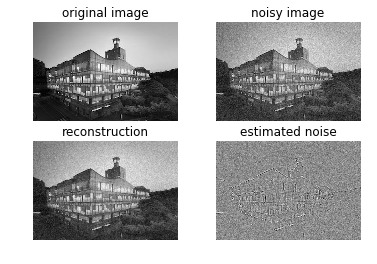

reconstruction error:  40.42476545704194
std is 0.2 and lambda is 0.25


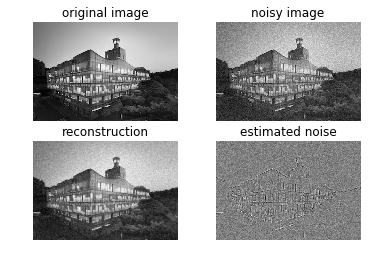

reconstruction error:  50.53177962554568
std is 0.2 and lambda is 0.5


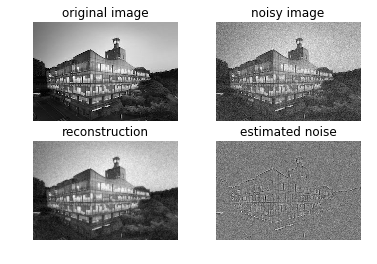

reconstruction error:  61.0010209712106
std is 0.2 and lambda is 1


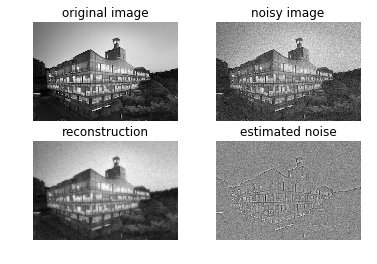

reconstruction error:  71.09207442149943
std is 0.2 and lambda is 2


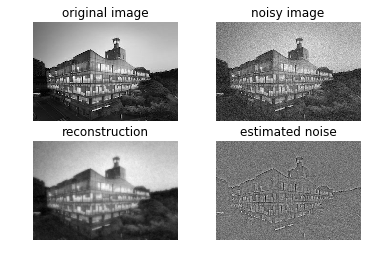

reconstruction error:  79.8528794220566
std is 0.2 and lambda is 4


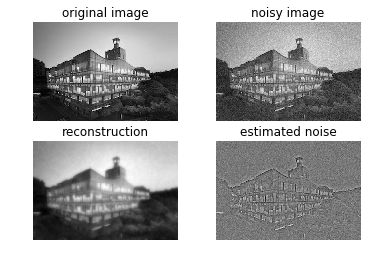

reconstruction error:  88.54735972785686
std is 0.2 and lambda is 8


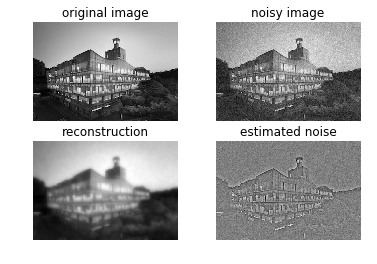

reconstruction error:  97.30896559169078
std is 0.4 and lambda is 0.125


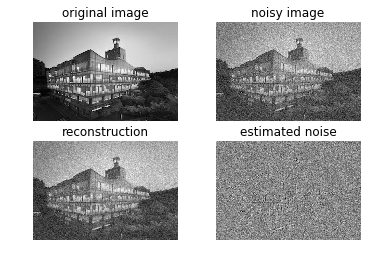

reconstruction error:  62.42711505035598
std is 0.4 and lambda is 0.25


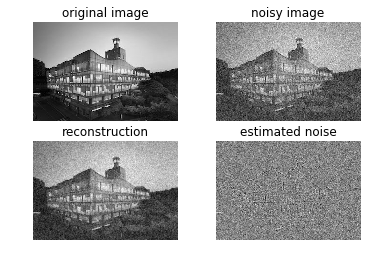

reconstruction error:  77.14298491379552
std is 0.4 and lambda is 0.5


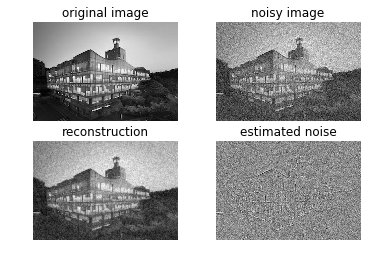

reconstruction error:  90.84515850900947
std is 0.4 and lambda is 1


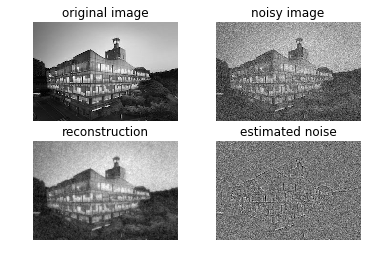

reconstruction error:  102.00848441277051
std is 0.4 and lambda is 2


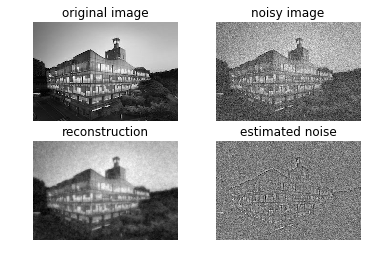

reconstruction error:  112.75549294011509
std is 0.4 and lambda is 4


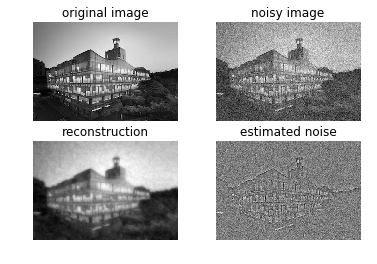

reconstruction error:  120.77432960981282
std is 0.4 and lambda is 8


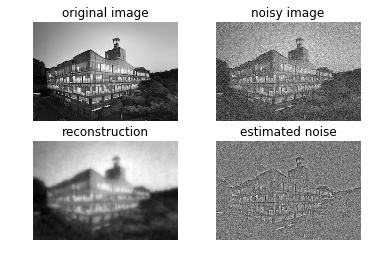

reconstruction error:  127.99206587867067
std is 0.6000000000000001 and lambda is 0.125


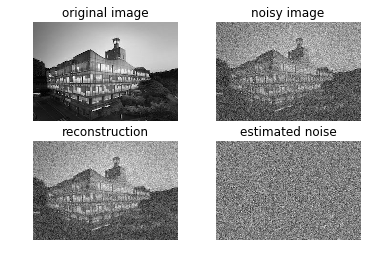

reconstruction error:  88.0955429767099
std is 0.6000000000000001 and lambda is 0.25


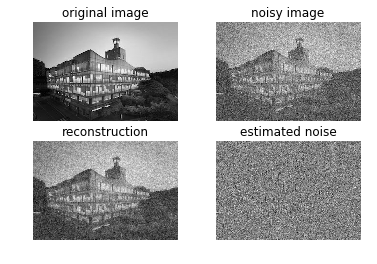

reconstruction error:  108.10398460910233
std is 0.6000000000000001 and lambda is 0.5


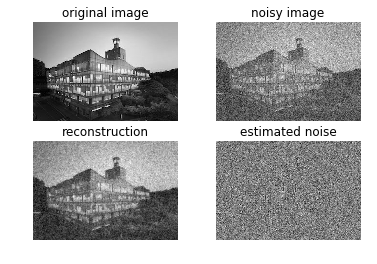

reconstruction error:  125.74630010028501
std is 0.6000000000000001 and lambda is 1


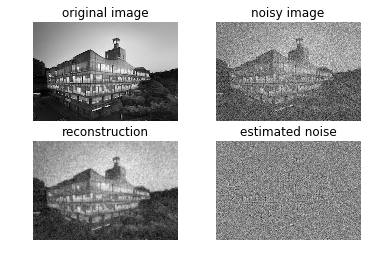

reconstruction error:  140.48053149664165
std is 0.6000000000000001 and lambda is 2


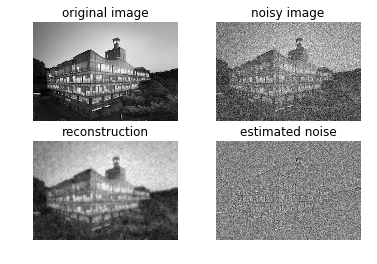

reconstruction error:  151.5446889165963
std is 0.6000000000000001 and lambda is 4


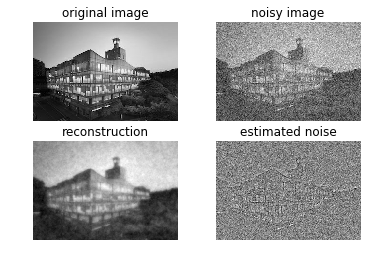

reconstruction error:  160.05988082015534
std is 0.6000000000000001 and lambda is 8


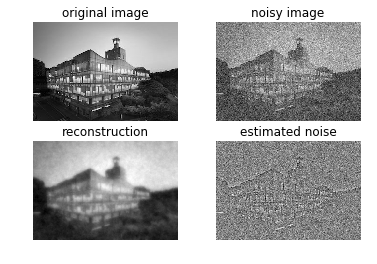

reconstruction error:  168.13285726062583


In [10]:
lst_err=[]

for i in range(3):
    
    errs=[]
    
    for j in range(-3,4):
        
        
        # Set lambda
        lamb=pow(2,j)
        
        # Set std
        noise_std=0.2*(i+1)
        
        print("std is",noise_std,"and lambda is",lamb)
        
        # Make noisy image
        noise       = np.random.normal(0, noise_std, (row, col))
        im_noise    = im + noise
        
        # Vectorize the noisy image in column-wise to solve least square problem
        v_noise=mat_to_vec(im_noise)

        # Reconstruct the noisy image
        A,b=make_LSform(v_noise,lamb)

        v_recon=solve(A,b)
        
        # Compute the reconstruction error
        error=compute_error(A,v_recon,b)
        
        errs.append(error)

        # Reshape the column-wise vectorized image to matrix form
        im_recon=v_recon.reshape(row,col,order='F')
        noise_recon=im_noise-im_recon

        # Show the results
        p1 = plt.subplot(2,2,1)
        p1.set_title('original image')
        plt.imshow(im, cmap='gray')
        plt.axis('off')

        p2 = plt.subplot(2,2,2)
        p2.set_title('noisy image')
        plt.imshow(im_noise, cmap='gray')
        plt.axis('off')

        p3 = plt.subplot(2,2,3)
        p3.set_title('reconstruction')
        plt.imshow(im_recon, cmap='gray')
        plt.axis('off')

        p4 = plt.subplot(2,2,4)
        p4.set_title('estimated noise')
        plt.imshow(noise_recon, cmap='gray')
        plt.axis('off')
        
        plt.show()
        
        print("reconstruction error: ",error)
    lst_err.append(errs)

# Plot the Reconstruction error 

std is  0.2


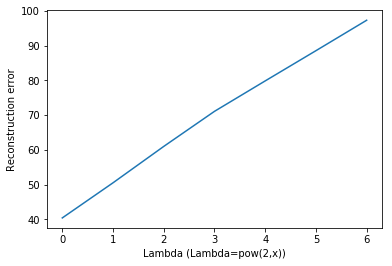

std is  0.4


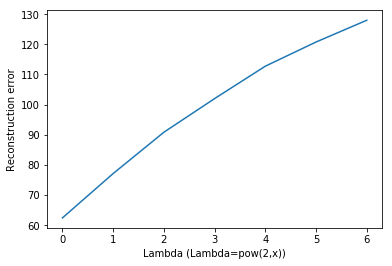

std is  0.6000000000000001


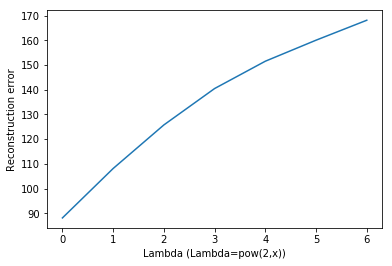

In [14]:
ind=0

for i in lst_err:
    
    print("std is ",0.2*(ind+1))
    plt.plot(i)
    plt.xlabel("Lambda (Lambda=pow(2,x))")
    plt.ylabel("Reconstruction error")
    plt.show()
    
    ind+=1